# Exercise 4.11 in ISLR

In [1]:
import os

In [2]:
DATA_RESP = 'datasets\ISLR'
DATA_SET = 'Auto.csv'

In [3]:
import pandas as pd

In [4]:
Auto_ = pd.read_csv(os.path.join(DATA_RESP,DATA_SET),index_col=0)

In [5]:
median_mpg = Auto_['mpg'].median()
Auto__ = Auto_.copy()
Auto__['mpg01'] = (Auto_['mpg']>median_mpg) * 1
Auto__.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


In [6]:
Auto__.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 1 to 397
Data columns (total 10 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
mpg01           392 non-null int32
dtypes: float64(3), int32(1), int64(5), object(1)
memory usage: 32.2+ KB


## quantify the 'name' col  by its brands

* transform 'name' to its 'brand'

In [7]:
try:
    Auto__['brand'] = Auto_['name'].apply(lambda x: x.split()[0])
    Auto__.drop('name',axis=1,inplace=True)
    pass
except Exception as e:
    pass

* categorize 'brand'
    * one way is to use 
    from sklearn.preprocessing import LabelEncoder it won't keep the original name if we rerun the code
    * another way is to define a dict

In [8]:
def brand_index(brands):
    brand_set = sorted(set(brands))
    brand_dict = {}
    for idx,brand in enumerate(brand_set):
        brand_dict[brand] = idx
    return brand_dict
    

In [9]:
brand_dict = brand_index(Auto__['brand'])

In [10]:
Auto__['brand'] = Auto__['brand'].apply(lambda x: brand_dict[x])
Auto__.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01,brand
1,18.0,8,307.0,130,3504,12.0,70,1,0,7
2,15.0,8,350.0,165,3693,11.5,70,1,0,3
3,18.0,8,318.0,150,3436,11.0,70,1,0,25
4,16.0,8,304.0,150,3433,12.0,70,1,0,0
5,17.0,8,302.0,140,3449,10.5,70,1,0,13


## intuitive view

C:\Users\gakki\AppData\Local\conda\conda\envs\ml\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


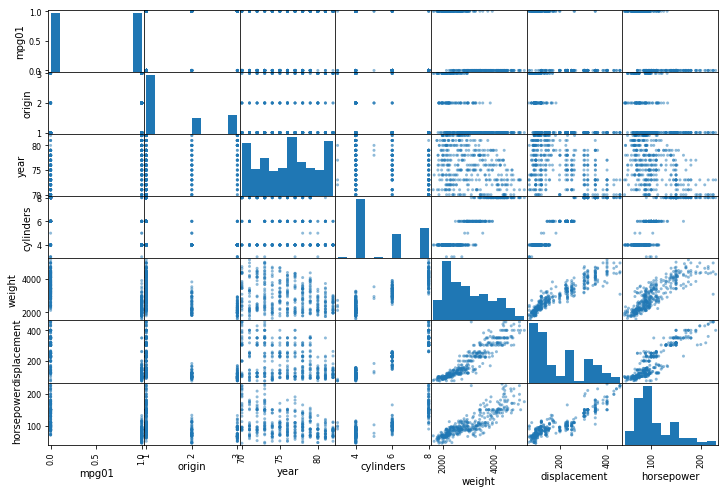

In [13]:
%matplotlib inline
from pandas.tools.plotting import scatter_matrix
attribute = ['mpg01','origin','year','cylinders','weight','displacement','horsepower']
scat = scatter_matrix(Auto__[attribute],figsize=(12,8))

** not that informative!**

In [14]:

import matplotlib.pyplot as plt
plt.style.use('ggplot')

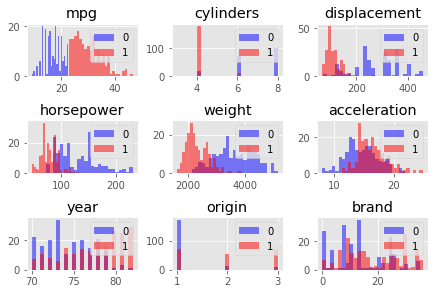

In [15]:
for num, alpha in zip(range(1, len(Auto__)), Auto__.loc[:, Auto__.columns != 'mpg01']):
    plt.subplot(3, 3, num)
    plt.hist(Auto__[alpha][Auto__['mpg01']==0], bins=25, alpha=0.5, label='0', color='b')
    plt.hist(Auto__[alpha][Auto__['mpg01']==1], bins=25, alpha=0.5, label='1', color='r')
    plt.legend(loc='upper right')
    plt.title(alpha)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

the relationship between `mpg 0` and `mpg 1` is much more clearly

## linear correlation

In [16]:
corr_matrix = Auto__.corr()

In [122]:
corr_matrix['mpg01'].sort_values(ascending=False)

mpg01           1.000000
mpg             0.836939
origin          0.513698
year            0.429904
acceleration    0.346822
brand           0.276246
horsepower     -0.667053
displacement   -0.753477
weight         -0.757757
cylinders      -0.759194
Name: mpg01, dtype: float64

## Avoid sample bias

In [123]:
Auto__['mpg01'].value_counts()/len(Auto__['mpg01'])

1    0.5
0    0.5
Name: mpg01, dtype: float64

In [124]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(Auto__, test_size=0.2, random_state=42)

In [125]:
test_set['mpg01'].value_counts()/len(test_set['mpg01'])

0    0.531646
1    0.468354
Name: mpg01, dtype: float64

### ！bias exists, use stratefied split

it is a sample method that takes the volume of each category into account

In [126]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [127]:
for train_index, test_index in split.split(Auto__,Auto__['mpg01']):
    strated_train_set = Auto__.iloc[train_index]
    strated_test_set = Auto__.iloc[test_index]

In [128]:
strated_test_set['mpg01'].value_counts()/len(test_set['mpg01'])

0    0.506329
1    0.493671
Name: mpg01, dtype: float64

** much better!**

In [129]:
Auto_train_x = strated_train_set.drop(["mpg","mpg01"],axis=1)
Auto_train_y = strated_train_set["mpg01"].copy()
Auto_test_x = strated_test_set.drop(["mpg","mpg01"],axis=1)
Auto_test_y = strated_test_set["mpg01"].copy()

# Logistic Regression

In [130]:
from sklearn.linear_model import LogisticRegression
import numpy as np

In [131]:
lin_reg = LogisticRegression()
lin_reg.fit(Auto_train_x, Auto_train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [132]:
pred_y = lin_reg.predict(Auto_test_x)
print("the error rate of Logistic Regression without optimization is: ", 1-np.mean(pred_y==Auto_test_y))

the error rate of Logistic Regression without optimization is:  0.113924050633


## Feature engineering

### feature scaling

In [133]:
from sklearn.preprocessing import MinMaxScaler

In [134]:
min_max_scaler = MinMaxScaler()

In [135]:
Auto_train_x = strated_train_set.drop(["mpg","mpg01"],axis=1)
Auto_train_y = strated_train_set["mpg01"].copy()
Auto_test_x = strated_test_set.drop(["mpg","mpg01"],axis=1)
Auto_test_y = strated_test_set["mpg01"].copy()
Auto_train_x = min_max_scaler.fit_transform(Auto_train_x)
Auto_train_x

pd.DataFrame(Auto_train_x).head()

,0,1,2,3,4,5,6,7
0,0.2,0.186047,0.228261,0.313864,0.440476,0.666667,0.0,0.361111
1,0.2,0.186047,0.228261,0.356394,0.601190,0.833333,0.0,0.361111
2,0.2,0.116279,0.266304,0.188546,0.446429,0.166667,1.0,0.833333
3,0.6,0.338501,0.239130,0.293451,0.416667,0.000000,0.0,0.000000
4,0.2,0.186047,0.141304,0.223419,0.684524,0.250000,0.0,0.194444


In [136]:
lin_reg = LogisticRegression()
lin_reg.fit(Auto_train_x, Auto_train_y)
Auto_pred_y = lin_reg.predict(min_max_scaler.transform(Auto_test_x))
print("the error rate of Logistic Regression without optimization is: ", 1-np.mean(Auto_pred_y==Auto_test_y))

the error rate of Logistic Regression without optimization is:  0.101265822785


### feature type transformation

the cylinder brand and origin can be seen as a factor, we can use category vectors

In [137]:
from sklearn.preprocessing import LabelBinarizer

In [138]:
encoder = LabelBinarizer(sparse_output=True)
cylinders_encoded = encoder.fit_transform(Auto__['cylinders'])
brand_encoded = encoder.fit_transform(Auto__['brand'])
origin_encoded = encoder.fit_transform(Auto__['origin'])
origin_encoded[:20].toarray()

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]], dtype=int32)

## pipeline 

In [139]:
from sklearn.pipeline import FeatureUnion, Pipeline

### Transformer

In [140]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelBinarizer

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X): 
        return X[self.attribute_names]

class MedianCategorical(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self,X, y=None):
        self.median = np.median(X[self.attribute_names])
        return self
    
    def transform(self, X, y=None):
        return (X[self.attribute_names] > self.median) * 1
    
class Name2Brand(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        labels = [x.split()[0] for x in X['name']]
        return np.c_[labels]
    
class PipLabelBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self,sparse_output=True):
        self.sparse_output = sparse_output

    
    def fit(self, X, y=None):
        self.encoder = LabelBinarizer(sparse_output=self.sparse_output)
        self.encoder.fit(X)
        return self
    
    def transform(self, X, y=None):
        result = self.encoder.transform(X)
        return result

### pipeline and FeatureUnion

In [141]:
label_attribute = ['mpg']
num_attribute = ['displacement','horsepower','weight','acceleration','year']
cate_attribute = ['cylinders','origin']
brand_attribute = ['name']

label_pipline = Pipeline([
    ('selector', DataFrameSelector(label_attribute)),
    ('medianCategorical', MedianCategorical(label_attribute)),
])
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribute)),
    ('min_max_scaler', MinMaxScaler()),
])
cate_pipeline0 = Pipeline([
    ('selector', DataFrameSelector(cate_attribute[0])),
    ('PipLabelBinarizer', PipLabelBinarizer(sparse_output=False)),
])
cate_pipeline1 = Pipeline([
    ('selector', DataFrameSelector(cate_attribute[1])),
    ('PipLabelBinarizer', PipLabelBinarizer(sparse_output=False)),
])
brand_pipeline = Pipeline([
    ('selector', DataFrameSelector(brand_attribute)),
    ('name2brand', Name2Brand()),
    ('PipLabelBinarizer', PipLabelBinarizer(sparse_output=False)),
])

full_pipeline = FeatureUnion([
    ('label_pipline',label_pipline),
    ('num_pipeline',num_pipeline),
    ('cate_pipeline0',cate_pipeline0),
    ('cate_pipeline1',cate_pipeline1),
    ('brand_pipeline',brand_pipeline),    
])

In [142]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(Auto_, test_size=0.2, random_state=42)
train_set['mpg'].apply(lambda x:x>np.median(train_set['mpg'])).value_counts()

False    162
True     151
Name: mpg, dtype: int64

In [143]:
train_array = full_pipeline.fit_transform(train_set)
train_x = train_array[:,1:]
train_y = np.asarray(train_array[:,0], dtype="int")

In [144]:
lin_reg = LogisticRegression()
lin_reg.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [145]:
test_array = full_pipeline.transform(test_set)
test_x = test_array[:,1:]
test_y = test_array[:,0]
pred_y = lin_reg.predict(test_x)
print("error rate without feature engineering is: ", 1-np.mean(Auto_pred_y==Auto_test_y))
print("error rate with feature engineering is:    ", 1-np.mean(pred_y==test_y))
pd.value_counts(test_y==0)

error rate without feature engineering is:  0.101265822785
error rate with feature engineering is:     0.101265822785


True     43
False    36
dtype: int64

### feature reducing

In [146]:
from sklearn.pipeline import FeatureUnion, Pipeline
label_attribute = ['mpg']
num_attribute = ['displacement','horsepower','weight','acceleration','year']
cate_attribute = ['cylinders','origin']
brand_attribute = ['name']

label_pipline = Pipeline([
    ('selector', DataFrameSelector(label_attribute)),
    ('medianCategorical', MedianCategorical(label_attribute)),
])
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribute)),
    ('min_max_scaler', MinMaxScaler()),
])
cate_pipeline0 = Pipeline([
    ('selector', DataFrameSelector(cate_attribute[0])),
    ('PipLabelBinarizer', PipLabelBinarizer(sparse_output=False)),
])
cate_pipeline1 = Pipeline([
    ('selector', DataFrameSelector(cate_attribute[1])),
    ('PipLabelBinarizer', PipLabelBinarizer(sparse_output=False)),
])
brand_pipeline = Pipeline([
    ('selector', DataFrameSelector(brand_attribute)),
    ('name2brand', Name2Brand()),
    ('PipLabelBinarizer', PipLabelBinarizer(sparse_output=False)),
])

full_pipeline = FeatureUnion([
    ('label_pipline',label_pipline),
    #('num_pipeline',num_pipeline),
    ('cate_pipeline0',cate_pipeline0),
    #('cate_pipeline1',cate_pipeline1),
])

In [147]:
train_array = full_pipeline.fit_transform(train_set)
train_x = train_array[:,1:]
train_y = np.asarray(train_array[:,0], dtype="int")
train_x

array([[0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       ..., 
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1]], dtype=object)

In [148]:
lin_reg = LogisticRegression()
lin_reg.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [149]:
test_array = full_pipeline.transform(test_set)
test_x = test_array[:,1:]
test_y = test_array[:,0]
lr_pred_y = lin_reg.predict(test_x)
print("error rate without feature engineering is: ", 1-np.mean(Auto_pred_y==Auto_test_y))
print("error rate with feature engineering is:    ", 1-np.mean(lr_pred_y==test_y))
pd.value_counts(test_y==0)

error rate without feature engineering is:  0.101265822785
error rate with feature engineering is:     0.101265822785


True     43
False    36
dtype: int64

**we can see that 'cylinders' helps to decrease the error rate **

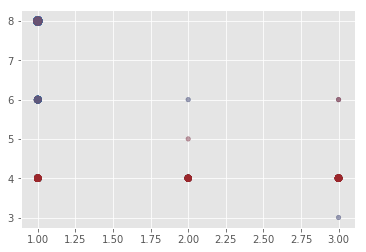

In [150]:
attribute = ['origin','cylinders']
colors = {0:'#377eb8',1:'#a8572c'}
color = Auto__['mpg01'].apply(lambda x: (x==0)*'#377eb8'+(x==1)*'#a1272c')
from collections import defaultdict
def twod_count(x,y):
    xx = sorted(set(x))
    yy = sorted(set(y))
    counter_xy = defaultdict(int)
    xy = []
    for itemx,itemy in zip(x,y):
            counter_xy[(itemx,itemy)] += 1
    
    for itemx,itemy in zip(x,y):
        xy.append(counter_xy[(itemx,itemy)]) 
    return np.array(xy)

size_ = twod_count(Auto__[attribute[0]],Auto__[attribute[1]])
size__ = [20*4**n for n in (size_-min(size_))/(max(size_)-min(size_))]
plt.scatter(Auto__[attribute[0]],Auto__[attribute[1]],color=color,alpha=0.2, s=size__)

In [151]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [152]:
lda = LinearDiscriminantAnalysis()

In [153]:
lda.fit(train_x,train_y)

C:\Users\gakki\AppData\Local\conda\conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [154]:
lda_y = lda.predict(test_x)
print("error rate with lda is:    ", 1-np.mean(lda_y==test_y))

error rate with lda is:     0.101265822785


In [155]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [156]:
qda = QuadraticDiscriminantAnalysis()

In [157]:
qda.fit(train_x,train_y)

C:\Users\gakki\AppData\Local\conda\conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [158]:
qda_y = qda.predict(test_x)
print("error rate with qda is:    ", 1-np.mean(qda_y==test_y))

error rate with qda is:     0.101265822785


In [159]:
from sklearn.neighbors import KNeighborsClassifier

In [160]:
knn = KNeighborsClassifier(n_neighbors=10)

In [161]:
knn.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [162]:
knn_y = knn.predict(test_x)
print("error rate with knn is:    ", 1-np.mean(knn_y==test_y))

error rate with knn is:     0.101265822785
